In [2]:
%pip install statsmodels
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Use Only GDP as the key predictor (USING ARIMA)


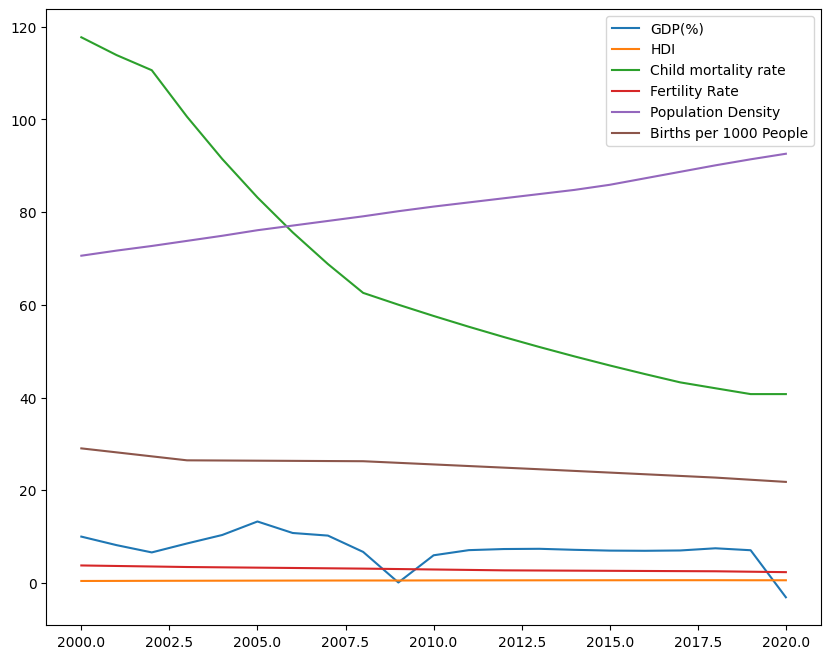

Population Density       -0.981843
Year                     -0.979370
HDI                      -0.929410
GDP(%)                    0.467210
Child mortality rate      0.901888
Fertility Rate            0.966357
Births per 1000 People    1.000000
Name: Births per 1000 People, dtype: float64


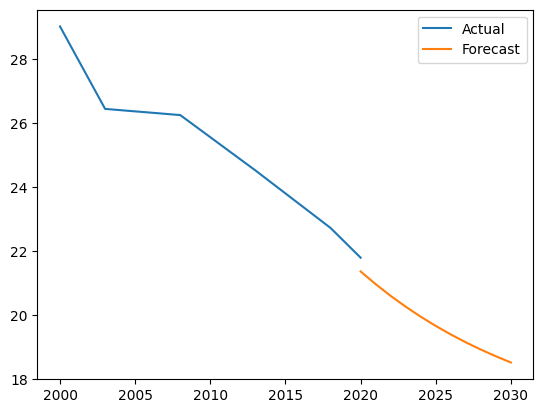

    Year  Projected Births per 1000 People
21  2020                         21.364266
22  2021                         20.966663
23  2022                         20.599642
24  2023                         20.260851
25  2024                         19.948118
26  2025                         19.659439
27  2026                         19.392965
28  2027                         19.146986
29  2028                         18.919928
30  2029                         18.710333
31  2030                         18.516860


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your datasets
main_data = pd.read_csv('Processed_Data/data-point.csv')
birth_rate_data = pd.read_csv('Processed_Data/birth-rate.csv')

# Merge datasets on 'Year'
full_data = pd.merge(main_data, birth_rate_data, on='Year')

# EDA: Plotting the trends
plt.figure(figsize=(10, 8))
for column in full_data.columns[1:]:  # Skip 'Year' column
    plt.plot(full_data['Year'], full_data[column], label=column)
plt.legend()
plt.show()

# Correlation
correlation_matrix = full_data.corr()
print(correlation_matrix['Births per 1000 People'].sort_values())

# Model Training: Using ARIMA as an example for time-series forecasting
# For simplicity, let's assume we're using GDP as the sole predictor for now

# Fit the model
model = ARIMA(full_data['Births per 1000 People'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=11)  # Forecasting the next 11 years (2020-2030 inclusive)

# Plot the forecast
plt.plot(full_data['Year'], full_data['Births per 1000 People'], label='Actual')
forecast_years = list(range(2020, 2031))  # Including 2020 as the starting forecast year
plt.plot(forecast_years, forecast, label='Forecast')
plt.legend()
plt.show()

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Year': forecast_years, 'Projected Births per 1000 People': forecast})

# Display the forecast DataFrame
print(forecast_df)


## Use all 5 Data points as predictors (USING RANDOMFOREST REGRESSOR)

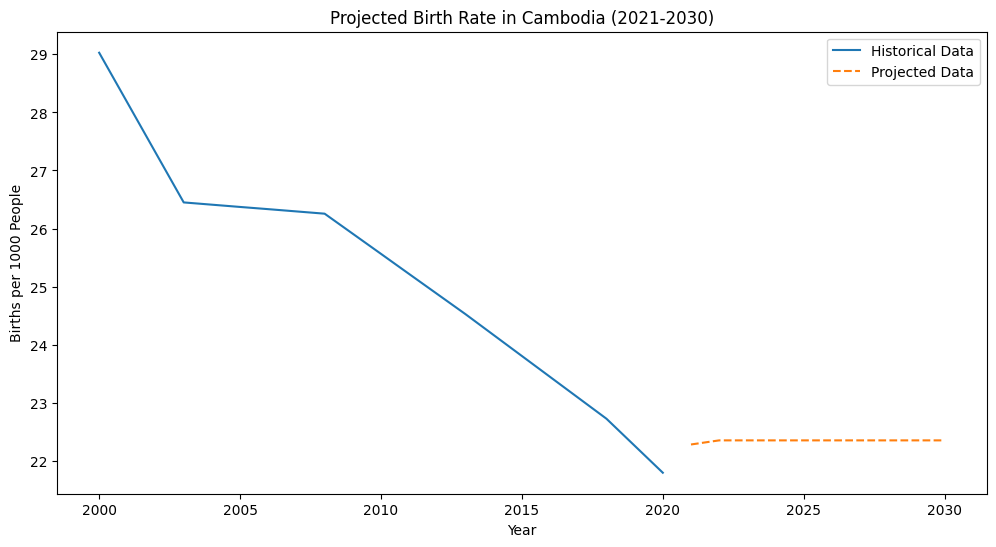

    Year  Projected Birth Rate
21  2021               22.2813
22  2022               22.3521
23  2023               22.3521
24  2024               22.3521
25  2025               22.3521
26  2026               22.3521
27  2027               22.3521
28  2028               22.3521
29  2029               22.3521
30  2030               22.3521


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your datasets
data_points = pd.read_csv('Processed_Data/data-point.csv')  # Historical + Projected Predictor Data
birth_rate_data = pd.read_csv('Processed_Data/birth-rate.csv')  # Historical Birth Rate Data

# Split data_points into historical (2010-2020) and future (2021-2030)
historical_predictors = data_points[data_points['Year'] <= 2020]
future_predictors = data_points[data_points['Year'] > 2020]

# Merge historical predictors with historical birth rate
historical_data = pd.merge(historical_predictors, birth_rate_data, on='Year')

# Split the historical data into features (X) and target (y)
X_historical = historical_data[['GDP(%)', 'HDI', 'Child mortality rate', 'Fertility Rate', 'Population Density']]
y_historical = historical_data['Births per 1000 People']

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_historical, y_historical)

# Predict future birth rates
X_future = future_predictors[['GDP(%)', 'HDI', 'Child mortality rate', 'Fertility Rate', 'Population Density']]
future_birth_rates = model.predict(X_future)

# Creating a DataFrame for the projections
projection = pd.DataFrame({'Year': future_predictors['Year'], 'Projected Birth Rate': future_birth_rates})

# Plotting the projections
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Year'], historical_data['Births per 1000 People'], label='Historical Data')
plt.plot(projection['Year'], projection['Projected Birth Rate'], label='Projected Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Births per 1000 People')
plt.title('Projected Birth Rate in Cambodia (2021-2030)')
plt.legend()
plt.show()

# Print the projection table
print(projection)


## Training using all 5 data point as predictor (USING XGBOOST)

In [4]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

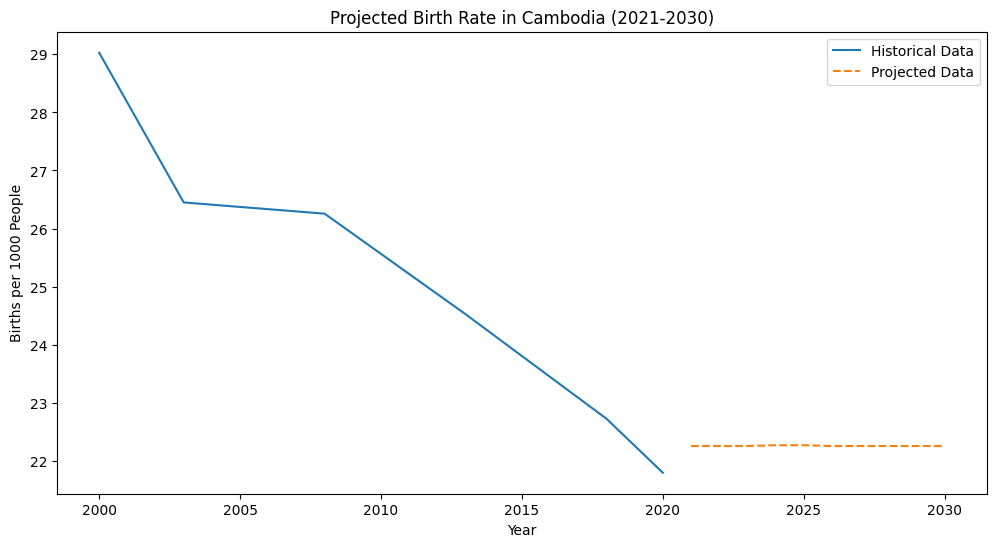

    Year  Projected Birth Rate
21  2021             22.254761
22  2022             22.254761
23  2023             22.254761
24  2024             22.268803
25  2025             22.268803
26  2026             22.254761
27  2027             22.254761
28  2028             22.254761
29  2029             22.254761
30  2030             22.254761


In [5]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your datasets
data_points = pd.read_csv('Processed_Data/data-point.csv')  # Contains data from 2010-2030
birth_rate_data = pd.read_csv('Processed_Data/birth-rate.csv')  # Contains data from 2010-2020

# Split data_points into historical (2010-2020) and future (2021-2030)
historical_predictors = data_points[data_points['Year'] <= 2020]
future_predictors = data_points[data_points['Year'] > 2020]

# Merge historical predictors with historical birth rate
historical_data = pd.merge(historical_predictors, birth_rate_data, on='Year')

# Split the historical data into features (X) and target (y)
X_historical = historical_data[['GDP(%)', 'HDI', 'Child mortality rate', 'Fertility Rate', 'Population Density']]
y_historical = historical_data['Births per 1000 People']

# Train-test split for model validation
X_train, X_test, y_train, y_test = train_test_split(X_historical, y_historical, test_size=0.2, random_state=42)

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict future birth rates
X_future = future_predictors[['GDP(%)', 'HDI', 'Child mortality rate', 'Fertility Rate', 'Population Density']]
future_birth_rates = best_model.predict(X_future)

# Creating a DataFrame for the projections
projection = pd.DataFrame({'Year': future_predictors['Year'], 'Projected Birth Rate': future_birth_rates})

# Plotting the projections
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Year'], historical_data['Births per 1000 People'], label='Historical Data')
plt.plot(projection['Year'], projection['Projected Birth Rate'], label='Projected Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Births per 1000 People')
plt.title('Projected Birth Rate in Cambodia (2021-2030)')
plt.legend()
plt.show()

# Print the projection table
print(projection)
